# Ridge Regression with Linear Model and Perceptrons

Student Name: **Zhe HUANG**

Student ID: **22302183**

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Q1: Boston Housing Prices dataset

In [2]:
# Load the Boston housing dataset
file_path = './BostonHousing.csv'
boston_housing_df = pd.read_csv(file_path)

# Display the first few rows of the dataset
boston_housing_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
# The shape of the dataset
N_boston, d_boston = boston_housing_df.shape
d_boston -= 1 # The last column is the target
print("The Boston housing dataset contains N={0} samples and d={1} features".format(N_boston, d_boston))

# The features and labels
X_boston = boston_housing_df.drop('medv', axis=1)
y_boston = boston_housing_df['medv']
print("The {0} features are: {1}".format(d_boston, list(X_boston.columns)))
display(X_boston.head())
display(y_boston.head())

The Boston housing dataset contains N=506 samples and d=13 features
The 13 features are: ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat']


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: medv, dtype: float64

In [4]:
# Calculate the rank of X to verify that ker(X) = {0}
rank_X_boston = np.linalg.matrix_rank(X_boston)
ker_X_boston = d_boston - rank_X_boston
print("The rank of X is {0}, so dim(ker(X)) = {1}".format(rank_X_boston, ker_X_boston))

The rank of X is 13, so dim(ker(X)) = 0


In [5]:
# Calculate the correlation matrix of X
corr_matrix_boston = X_boston.corr()
print("The correlation matrix of X is:")
display(corr_matrix_boston)

The correlation matrix of X is:


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


Q: How does the correlation matrix look like?

A: Looking at the correlation matrix, we can see that certain variables are highly correlated. For example:

* 'nox' has a strong positive correlation with 'indus' $(0.763651)$, suggesting that as the industrial concentration increases, the nitric oxides pollution might also increase.
* 'dis' has a strong negative correlation with 'indus' $(-0.708027)$, indicating that locations with higher industrial concentration might be closer to employment centers.
* 'age' has a high positive correlation with 'nox' $(0.731470)$, which could mean that older buildings are more likely to be found in areas with higher nitric oxides pollution.

In [6]:
# Divide the dataset into training and test sets, 406 training samples and 100 test samples
X_boston_train = X_boston.iloc[:406, :]
y_boston_train = y_boston.iloc[:406]
X_boston_test = X_boston.iloc[406:, :]
y_boston_test = y_boston.iloc[406:]

In [7]:
# Standardize the features of the training set
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_boston_train)
# Standardize the features of the test set
X_standardized_test = scaler.transform(X_boston_test)

# CHECK: The mean of each feature should be 0
assert np.allclose(X_standardized.mean(axis=0), 0)
# CHECK: The standard deviation of each feature should be 1
assert np.allclose(X_standardized.std(axis=0), 1)



# Standardize the labels of the training set
y_standardized = scaler.fit_transform(y_boston_train.values.reshape(-1, 1))
y_standardized = y_standardized.reshape(-1)
# Standardize the labels of the test set
y_standardized_test = scaler.transform(y_boston_test.values.reshape(-1, 1))
y_standardized_test = y_standardized_test.reshape(-1)

# CHECK: The mean of the labels should be 0
assert np.allclose(y_standardized.mean(axis=0), 0)
# CHECK: The standard deviation of the labels should be 1
assert np.allclose(y_standardized.std(axis=0), 1)

## Q2: Linear Model

In [8]:
class LinearModel:
    def __init__(self):
        self.w = None # The weights of the model
        self.train_losses = None # The training losses in each iteration


    def predict(self, X):
        """
        Predict the labels of the samples in X with the trained model.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.

        Returns
        -------
        ndarray of shape (N,)
            The predicted labels.
        """
        y_pred = X.dot(self.w)
        return y_pred


    def E(self, X, y, w):
        """
        The loss function of regression.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        y : ndarray of shape (N,)
            The label vector.
        w : ndarray of shape (d,)
            The weights of the model.

        Returns
        -------
        float
            The value of the loss function.
        """
        loss = np.sum((X.dot(w) - y) ** 2)
        return loss

    
    def gradient(self, X, y, w):
        """
        Calculate the gradient of the loss function with respect to w.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        y : ndarray of shape (N,)
            The label vector.
        w : ndarray of shape (d,)
            The weights of the model.

        Returns
        -------
        ndarray of shape (d,)
            The gradient of the loss function.
        """
        gradient = 2 * X.T.dot(X.dot(w) - y)
        return gradient


    def fit(self, X, y, lr = 1e-4, num_iters = 100):
        """
        Train the linear regression model using gradient descent.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        y : ndarray of shape (N,)
            The label vector.
        lr : float
            The learning rate.
        num_iters : int
            The number of iterations.
        """
        N, d = X.shape
        self.train_losses = np.zeros(num_iters)
        self.w = np.zeros(d)
        # Gradient descent loop
        for i in range(num_iters):
            self.train_losses[i] = self.E(X, y, self.w)
            self.w -= lr * self.gradient(X, y, self.w)
                

In [9]:
# Use sklearn.linear_model.LinearRegression to verify that the linear model works correctly
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_standardized, y_standardized)
y_pred_1 = model.predict(X_standardized)

# CHECK: The shape of the predicted labels should be (N,)
assert y_pred_1.shape == (406,)


# Verify that the linear model works correctly
model = LinearModel()
model.fit(X_standardized, y_standardized)
y_pred_2 = model.predict(X_standardized)

# CHECK: The shape of the predicted labels should be (N,)
assert y_pred_2.shape == (406,)
# CHECK: The training loss should decrease in each iteration
assert np.all(np.diff(model.train_losses) <= 0)
# CHECK: The two predicted labels shouln't be too different
assert np.allclose(y_pred_1, y_pred_2, atol=0.3)


Here we implement a linear regression model with the loss function calculated as $$ E(w) := \| Xw - y \|_2^2 = \sum_{i=1}^{N} \left( \langle w, x_i \rangle - y_i \right)^2. $$

In this formulation:

* $X = (x_1, \ldots, x_N)^T \in \mathbb{R}^{N \times d}$ is the feature matrix, with $x_i \in \mathbb{R}^d$.

* $y \in \mathbb{R}^N$ is the vector of labels.

* $w \in \mathbb{R}^d$ is the vector of weights.


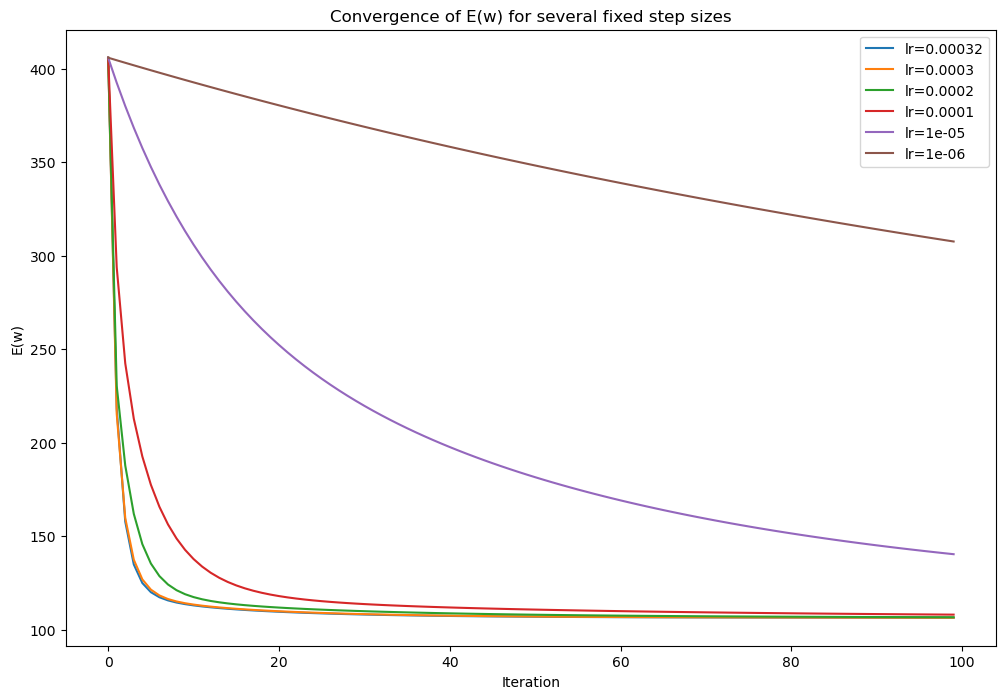

In [10]:
# Display the convergence of E(w) for several fixed step sizes
model = LinearModel()
plt.figure(figsize=(12, 8))
for lr in [0.00032, 0.0003, 0.0002, 0.0001, 1e-5, 1e-6]:
    model.fit(X_standardized, y_standardized, lr=lr)
    plt.plot(model.train_losses, label='lr={0}'.format(lr))
    
plt.xlabel('Iteration')
plt.ylabel('E(w)')
plt.legend()
plt.title('Convergence of E(w) for several fixed step sizes')
plt.show()

## Q3: Analysis of the step size $\tau$

Q: Experimentally, what is the optimal step $\tau$ ?

A: According to the experiment results above, the optimal step $\tau$ is $0.00032$. 
   This value allows for the fastest convergence of $E(w)$ without overshooting or causing instability in the learning 
   process.


In [11]:
# Calculate the theoretical upper bound of the step size for our small-scale dataset
eigenvalues, _ = np.linalg.eig(X_standardized.T.dot(X_standardized))
L = eigenvalues.max()
lr_upper = 1 / L
print("The theoretical upper bound of the step size is {0}".format(lr_upper))

The theoretical upper bound of the step size is 0.000442578639889499


Q: How does this compare with the theory?

A: The theoretical upper bound of the step size $\tau_{upper}$ is calculated as $ \tau_{upper} = \frac{1}{\lambda_{max}(X^TX)}$, which is $0.00044$ in this case. 
   The experimentally optimal step size $\tau = 0.00032$ is smaller than the upper bound $\tau_{upper}$, which is reasonable.

## Q4-6: Multilayer Perceptron

In [12]:
class MLP:
    def __init__(self, q):
        self.q = q # The number of neurons in the hidden layer
        
        # Parameters to be learned
        self.V = None # The inner weights
        self.w = None # The outer weights

        self.train_losses = None # The training losses in each iteration
    
    def g(self, X, V, w):
        """
        Calculate the output of the MLP.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        V : ndarray of shape (q, d)
            The inner weights, where the v_k are the columns of V.
        w : ndarray of shape (q,)

        Returns
        -------
        ndarray of shape (N,)
            The output of the MLP.
        """
        # Calculate the inner products <v_k, x> for each neuron k and input x
        inner_products = np.dot(X, V.T) # This results in a matrix of shape (N, q)
        
        # Multiply each inner product by the corresponding weight w_k and sum over k
        output = np.dot(inner_products, w) # This results in a vector of shape (N,)

        return output
    

    def F(self, X, y, V, w):
        """
        The loss function of MLP with two parameters V and w.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        y : ndarray of shape (N,)
            The target values.
        V : ndarray of shape (q, d)
            The inner weights.
        w : ndarray of shape (q,)
            The outer weights.

        Returns
        -------
        float
            Sum of squared differences between the predictions of the MLP and the target values.
        """
        # Calculate the predictions of the MLP for the input features X
        predictions = self.g(X, V, w)
        
        # Calculate the sum of squared differences between the predictions and the actual values
        loss = np.sum((predictions - y) ** 2)
        
        return loss
    

    def E(self, X, y, V0, w):
        """
        The loss function F(V0, w) when we fix V = V0.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        y : ndarray of shape (N,)
            The target values.
        V0 : ndarray of shape (q, d)
            The fixed inner weights.
        w : ndarray of shape (q,)
            The outer weights.
        
        Returns
        -------
        float
            The value of the loss function F(V0, w) when we fix V = V0.
        """
        # Calculate the transformed feature matrix X' using the fixed V0
        X_prime = np.dot(X, V0.T)

        # Calculate the loss function F(X, y) as a linear regression problem
        loss = np.sum((X_prime.dot(w) - y) ** 2, axis=0)

        return loss
    

    def gradient_E(self, X, y, V0, w):
        """
        Calculate the gradient of the loss function E(w) with respect to w.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        y : ndarray of shape (N,)
            The target values.
        V0 : ndarray of shape (q, d)
            The fixed inner weights.
        w : ndarray of shape (q,)
            The outer weights.

        Returns
        -------
        ndarray of shape (q,)
            The gradient of the loss function E(w) with respect to w.
        """
        # Calculate the transformed feature matrix X' using the fixed V0
        X_prime = np.dot(X, V0.T)
        
        # Calculate the gradient of the loss function E(w) with respect to w
        gradient = 2 * X_prime.T.dot(X_prime.dot(w) - y)
        return gradient
    

    def GradientDescent_E(self, X, y, V0, lr = 1e-5, num_iters = 100):
        """
        Here we fix V = V0 so that we make our MLP equivalent to a linear regression model.
        Train the tranformed linear regression model using gradient descent.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        y : ndarray of shape (N,)
            The label vector.
        V0 : ndarray of shape (q, d)
            The fixed inner weights.
        lr : float
            The learning rate.
        num_iters : int
            The number of iterations.
        """
        self.w = np.zeros(self.q)
        self.train_losses = np.zeros(num_iters)
        
        # Gradient descent loop
        for i in range(num_iters):
            self.train_losses[i] = self.E(X, y, V0, self.w)
            self.w -= lr * self.gradient_E(X, y, V0, self.w)
        

    def gradient_G(self, X, y, V, w_opt):
        """
        Fixing w = w_opt, we have G(V) = F(V, w_opt).
        Calculate the gradient of the loss function G(V) with respect to V.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        y : ndarray of shape (N,)
            The target values.
        V : ndarray of shape (q, d)
            The inner weights.
        w_opt : ndarray of shape (q,)
            The fixed outer weights.

        Returns
        -------
        ndarray of shape (q, d)
            The gradient of the loss function G(V) with respect to V.
        """
        # Initialize the gradient
        N, d = X.shape
        grad_G = np.zeros((self.q, d))
        
        for k in range(self.q):
            # Calculate the gradient of the loss function G(V) with respect to v_k
            for i, x_i in enumerate(X):
                grad_G[k] += 2 * (self.g(x_i, V, w_opt) - y[i]) * w_opt[k] * x_i
        
        return grad_G

    
    def GradientDescent_G(self, X, y, V0, w_opt, lr = 1e-5, num_iters = 100):
        """
        Here we fix w = w_opt and initialize V = V0.
        Use gradient descent to only optimize the inner weights V.

        Parameters
        ----------
        X : ndarray of shape (N, d)
            The feature matrix.
        y : ndarray of shape (N,)
            The label vector.
        V0 : ndarray of shape (q, d)
            The initial inner weights.
        w_opt : ndarray of shape (q,)
            The fixed outer weights.
        lr : float
            The learning rate.
        num_iters : int
            The number of iterations.
        """
        # Initialize the inner weights as V0
        self.V = V0.copy() # Important: We should use copy() to avoid modifying V0 !!!!!
        self.train_losses = np.zeros(num_iters)
        # Gradient descent loop
        for i in range(num_iters):
            self.train_losses[i] = self.F(X, y, self.V, w_opt)
            self.V -= lr * self.gradient_G(X, y, self.V, w_opt)


Here we implement a Multilayer Perceptron (MLP) with two layers: a single hidden layer consisting of q neurons and an output layer.
In this implementation, we do not apply any activation function.

The output of the MLP, denoted as $ g(\theta, x) $, is calculated as $$ g(\theta, x) := \sum_{k=1}^q w_k \langle v_k, x \rangle $$

where:

* $\theta = (V, w)$ are the parameters of the MLP, i.e. the inner weights $V$ and the outer weights $w$.

* $q$ is the number of neurons
  
* $w_k$ represents the $k$-th outer weight associated with the $k$-th neuron in the hidden layer.

* $v_k$ is the $k$-th column of the inner weight matrix $V$, corresponding to the $k$-th neuron's weights.




The original loss function we want to minimize is $$ F(\theta) := \sum_{i} |g(\theta, x_i) - y_i|^2. $$





## Q5:

Q: Why the function $ E(w) := F(V_0, w) $ is a regression problem of the same form as Question2 but with a different matrix X?

A: In the case that we fix $V = V_0$, we have 
$$ 
\begin{align}
E(w)
    :=& F(V_0, w) \\
    =& \sum_{i} |g(V_0, w, x_i) - y_i|^2 \\
    =& \sum_{i} |\sum_{k=1}^q w_k \langle v^0_k, x_i \rangle - y_i|^2 \\
    =& \sum_{i} |\langle w, x_i' \rangle - y_i|^2 \\
    =& \| X'w - y \|_2^2 \\
\end{align}
$$

where

* $X' = (x_1', x_2', ..., x_N')^T \in \mathbb{R}^{N \times q}$ is the transformed feature matrix, with each $x_i' = ( \langle v^0_1, x_i \rangle, \langle v^0_2, x_i \rangle, ..., \langle v^0_q, x_i \rangle ) \in \mathbb{R}^q$
* Easily, $ X' = XV_0^T $



Q: Is there always a unique solution to this problem?

A: We already know that $X\in \mathbb{R}^{N \times d}$ has full column rank and $V_0^T$ is a $d \times q$ random matrix.

* When $q > N$, $X' = XV_0^T \in \mathbb{R}^{N \times q}$ cannot have full column rank because the number of columns is larger than the number of rows. In this case, the problem may have an infinite number of solutions.

* When $q \leq N$ but $q > d$, $V_0^T$ cannot have full column rank because the number of columns is larger than the number of rows. Thus, $X' = XV_0^T$ cannot have full column rank. In this case, the problem may have an infinite number of solutions as well.

* When $q \leq N$ and $q \leq d$, $V_0^T$ likely has full column rank. Thus, $X' = XV_0^T$ likely has full column rank. In this case, the problem may have a unique solution.(I use 'likely' because there is still a small chance that $V_0^T$ does not have full column rank if the columns of $V_0^T$ are linearly dependent.)

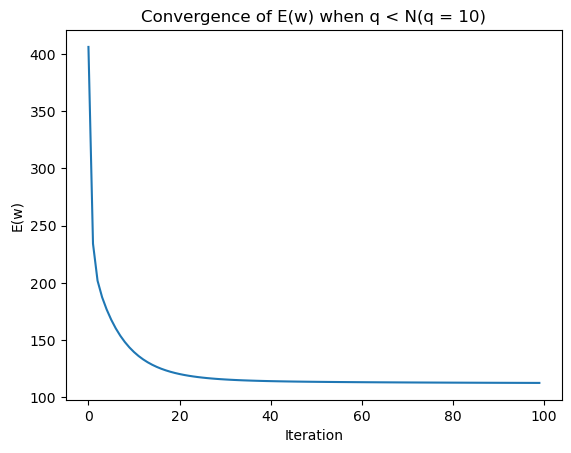

/var/folders/67/398kj6w97qd5336d3vvgf8b40000gn/T/ipykernel_75677/3674285293.py:90: RuntimeWarning: overflow encountered in square
  loss = np.sum((X_prime.dot(w) - y) ** 2, axis=0)
/Users/zhehuang/opt/anaconda3/envs/IASD/lib/python3.10/site-packages/numpy/core/fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/Users/zhehuang/opt/anaconda3/envs/IASD/lib/python3.10/site-packages/matplotlib/ticker.py:2098: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


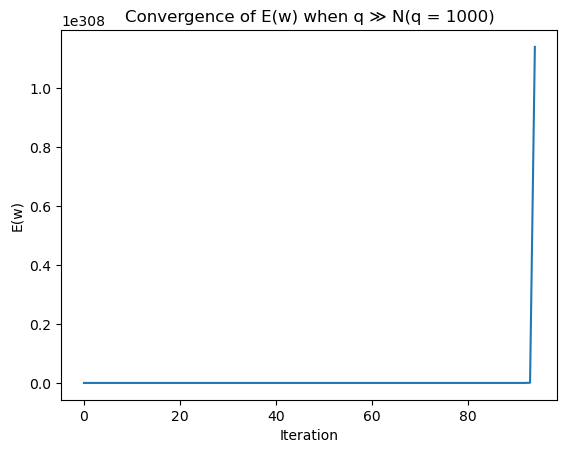

In [13]:
# We know that N = 406 and d = 13
# Implement gradient descent for a value of q < N and a value of q ≫ N

# When q < N
q = 10
# Initialize V = V0 to be a realization of a random matrix using np.random.randn
V0 = np.random.randn(q, d_boston)
model = MLP(q)
model.GradientDescent_E(X_standardized, y_standardized, V0=V0, lr=1e-5, num_iters=100)
plt.plot(model.train_losses)
plt.xlabel('Iteration')
plt.ylabel('E(w)')
plt.title('Convergence of E(w) when q < N(q = {0})'.format(q))
plt.show()

# When q ≫ N
q = 1000
# Initialize V = V0 to be a realization of a random matrix using np.random.randn
V0 = np.random.randn(q, d_boston)
model = MLP(q)
model.GradientDescent_E(X_standardized, y_standardized, V0=V0, lr=1e-5, num_iters=100)
plt.plot(model.train_losses)
plt.xlabel('Iteration')
plt.ylabel('E(w)')
plt.title('Convergence of E(w) when q ≫ N(q = {0})'.format(q))
plt.show()

Q: What does the theory tell us about the convergence?

A: We only consider the case that $q \leq N$ and $q \leq d$ here because it is the only case that the problem may have 
   a unique solution.
   
   Similar to Question 3, the theoretical upper bound of the step size $\tau_{upper}'$ is calculated as $ \tau_{upper}' = \frac{1}{\lambda_{max}(X'^TX')}$, which is $0.000035$ in this case.
   The convergence of the algorithm is then guaranteed if $\tau < \tau_{upper}'$.

In [23]:
# Calulate the theoretical upper bound of the step size for our small-scale dataset
q = 10
V0 = np.random.randn(q, d_boston)
X_prime = np.dot(X_standardized, V0.T)
eigenvalues, _ = np.linalg.eig(X_prime.T.dot(X_prime))
L = eigenvalues.max()
lr_upper = 1 / L
print("The theoretical upper bound of the step size is {0}".format(lr_upper))


The theoretical upper bound of the step size is 3.558778383287224e-05


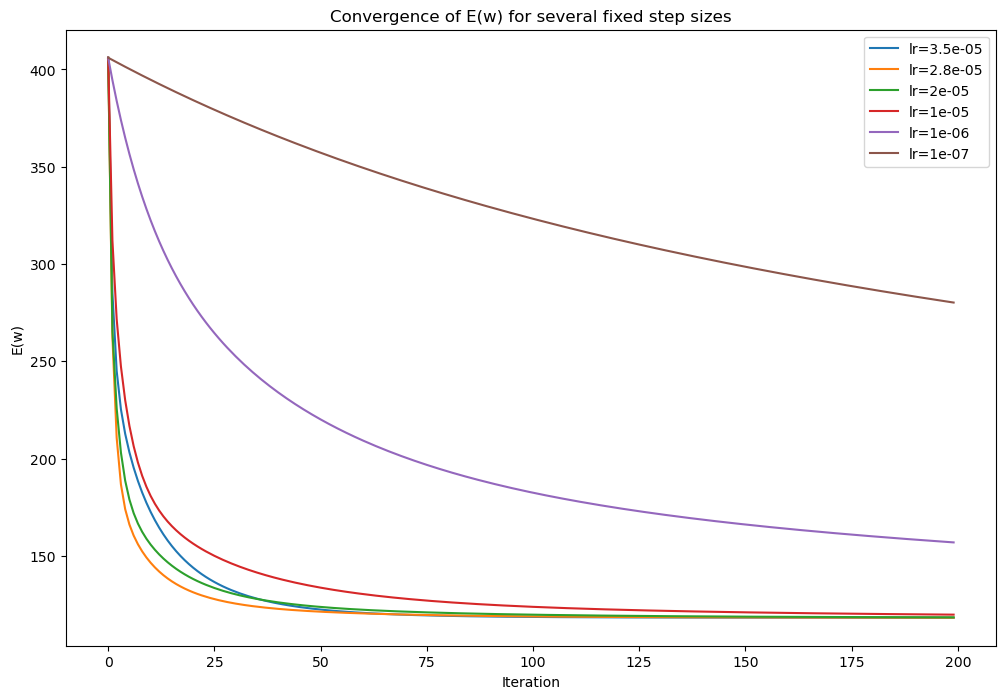

In [24]:
# Display the convergence of E(w) for several fxied step sizes
model = MLP(q)
plt.figure(figsize=(12, 8))
for lr in [3.5e-5, 2.8e-5, 2e-5, 1e-5, 1e-6, 1e-7]:
    model.GradientDescent_E(X_standardized, y_standardized, V0=V0, lr=lr, num_iters=200)
    plt.plot(model.train_losses, label='lr={0}'.format(lr))

plt.xlabel('Iteration')
plt.ylabel('E(w)')
plt.legend()
plt.title('Convergence of E(w) for several fixed step sizes')
plt.show()



Q: Experimentally, what is the optimal step $\tau$ ?

A: According to the experiment results above, the optimal step size $\tau$ is $0.000028$.
   This value allows for the fastest convergence of $E(w)$ without overshooting or causing instability in the learning 
   process.

## Q6:

Q: What is the gradient of the function $ G(V) := F(V, w^*) $(so we only optimize the inner weights)?

A: Firstly, we have
$$
\begin{align}
G(V)
    :=& F(V, w^*) \\
    =& \sum_{i} |g(V, w^*, x_i) - y_i|^2 \\
    =& \sum_{i} |\sum_{k=1}^q w_k^* \langle v_k, x_i \rangle - y_i|^2 \\
    =& \sum_{i} |\sum_{k=1}^q \langle v_k, w_k^*x_i \rangle - y_i|^2
\end{align}
$$

where

* $w^* = (w_1^*, w_2^*, ..., w_q^*)^T \in \mathbb{R}^q$ is the optimal outer weights obtained from Question 5.

Then we have
$$
\begin{align}
\frac{\partial G(V)}{\partial V}
    =& \begin{pmatrix}
       \frac{\partial G(V)}{\partial v_1}^T \\
       \\
       \frac{\partial G(V)}{\partial v_2}^T \\
       \\
       \vdots \\
       \\
       \frac{\partial G(V)}{\partial v_q}^T \\
       \\
       \end{pmatrix}
\end{align}
$$

where the $k$-th partial derivative is calculated as
$$
\begin{align}
\frac{\partial G(V)}{\partial v_k}
    =& \frac{\partial}{\partial v_k} \sum_{i} \left(\sum_{k=1}^q  \langle v_k, w_k^*x_i \rangle - y_i\right)^2 \\
    =& \sum_{i} \frac{\partial}{\partial v_k} \left(\sum_{k=1}^q  \langle v_k, w_k^*x_i \rangle - y_i\right)^2 \\
    =& \sum_{i} 2 \left(\sum_{k=1}^q  \langle v_k, w_k^*x_i \rangle - y_i\right) \cdot \frac{\partial}{\partial v_k} \left(\sum_{k=1}^q  \langle v_k, w_k^*x_i \rangle - y_i\right) \\
    =& \sum_{i} 2 \left(\sum_{k=1}^q  \langle v_k, w_k^*x_i \rangle - y_i\right) \cdot \frac{\partial}{\partial v_k} \langle v_k, w_k^*x_i \rangle \\
    =& \sum_{i} 2 \left(\sum_{k=1}^q  \langle v_k, w_k^*x_i \rangle - y_i\right) \cdot w_k^*x_i \\
   
\end{align}
$$

In [25]:
# Take an optimal w⋆ optimized using the previous question.
model = MLP(q)
model.GradientDescent_E(X_standardized, y_standardized, V0=V0, lr=2.8e-5, num_iters=200)
w_opt = model.w

In [26]:
# Note that we still use V0 from the previous question
# And we use w_opt as the fixed outer weights
print(V0)
print(w_opt)

[[-2.19111234 -1.67687886 -0.38912129  0.65020136 -0.23125112  1.00154272
   1.70505474  2.08921328 -3.04732692 -0.06154539  0.02503344  0.38803481
   1.55708138]
 [-1.39791011 -0.21490196  0.88970785  0.35893861 -0.42474741  0.98801359
   0.61182573  0.99130593  0.21828517  2.74380463  0.17127829 -0.81970745
   0.67810588]
 [-0.4851399   1.77269784 -1.09907665 -1.24411037 -0.67251332  0.74993756
   0.39993682  0.01100084  0.54898833 -0.61160761 -0.45554675  1.44794343
  -1.83816141]
 [-0.05585184  1.7769621   1.06291834  0.33458485  0.64184585 -1.95340918
  -1.18647238  1.23857447  0.56779491 -0.58112327  1.5096505   1.63947912
  -0.93871586]
 [ 1.3765501   1.04843996  1.94767412 -0.92710277 -0.41397442 -0.04898623
   0.05094615 -0.38006309  1.27513384 -0.70649084 -0.76316214  0.96554751
  -0.19142544]
 [-0.33486323  1.36467243 -0.25732041  1.52052051  2.45128761  1.66729178
  -1.03596794  0.08685911 -0.16649     0.70403661  1.00619187 -2.37040843
  -0.26175008]
 [-0.13660463  0.66278

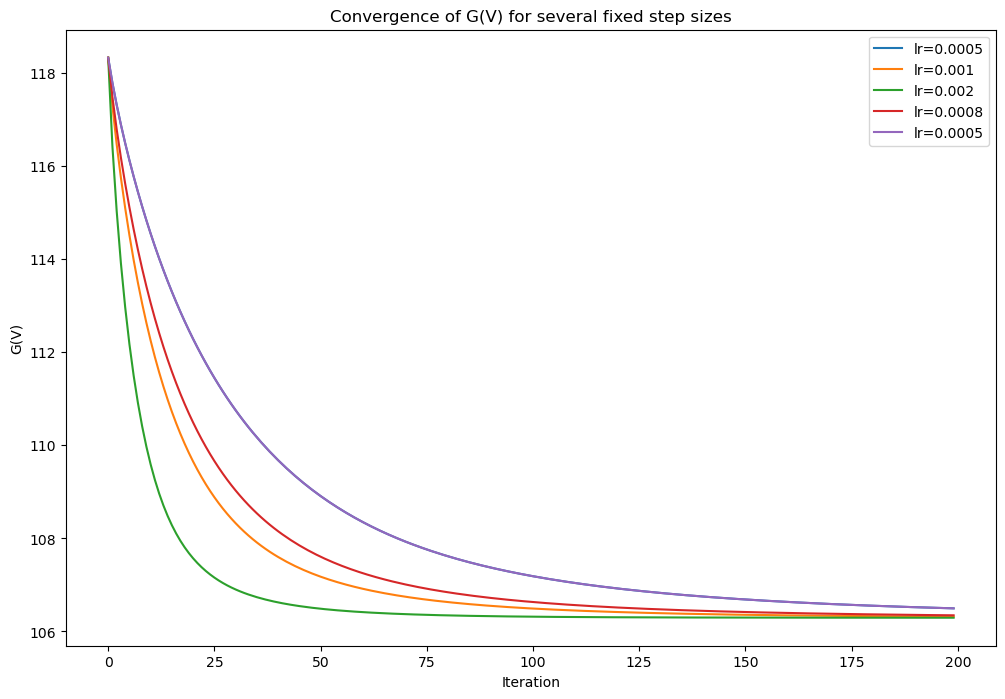

In [27]:
model = MLP(q)
# Display the convergence of G(V) := F(V, w_opt) for several fxied step sizes
plt.figure(figsize=(12, 8))
for lr in [0.0005, 0.001, 0.002, 0.0008, 0.0005]:
    model.GradientDescent_G(X_standardized, y_standardized, V0=V0, w_opt=w_opt, lr=lr, num_iters=200)
    plt.plot(model.train_losses, label='lr={0}'.format(lr))

plt.xlabel('Iteration')
plt.ylabel('G(V)')
plt.legend()
plt.title('Convergence of G(V) for several fixed step sizes')
plt.show()


In [30]:
# Verify that the MLP works correctly
model = MLP(q=10)
model.GradientDescent_G(X_standardized, y_standardized, V0=V0, w_opt=w_opt, lr=0.002, num_iters=200)
y_pred_1 = model.g(X_standardized, model.V, w_opt)

# CHECK: The shape of the predicted labels should be (N,)
assert y_pred_1.shape == (406,)
# CHECK: The training losses should decrease after each iteration
assert np.all(np.diff(model.train_losses) <= 0)



# Use sklearn.neural_network.MLPRegressor to verify that the MLP works correctly
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(hidden_layer_sizes=(10,), activation='identity', solver='sgd', learning_rate_init=1e-3, max_iter=200)
model.fit(X_standardized, y_standardized)
y_pred_2 = model.predict(X_standardized)

# CHECK: The shape of the predicted labels should be (N,)
assert y_pred_2.shape == (406,)
# CHECK: The two predicted labels shouln't be too different
assert np.allclose(y_pred_1, y_pred_2, atol=0.6)



## Bonues Question:

Compute the test error using the linear model and the MLP in the test set.

In [31]:
# Compute the test error using the linear model and the MLP in the test set.
# The test error of the linear model
model_linear = LinearModel()
model_linear.fit(X_standardized, y_standardized)
y_pred_linear = model_linear.predict(X_standardized_test)
test_error_linear = model_linear.E(X_standardized_test, y_standardized_test, model_linear.w)
print("The test error of the linear model is {0}".format(test_error_linear))

# The test error of the MLP
model_mlp = MLP(q=10)
model_mlp.GradientDescent_G(X_standardized, y_standardized, V0=V0, w_opt=w_opt, lr=0.002, num_iters=200)
y_pred_mlp = model_mlp.g(X_standardized_test, model_mlp.V, w_opt)
test_error_mlp = model_mlp.F(X_standardized_test, y_standardized_test, model_mlp.V, w_opt)
print("The test error of the MLP is {0}".format(test_error_mlp))


The test error of the linear model is 32.7212470472871
The test error of the MLP is 38.6085134348163
